In [1]:
from __future__ import print_function

import re, gensim, pickle, operator
import pandas as pd
import numpy as np
import networkx as nx
import seaborn as sns
from datetime import datetime
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

Using TensorFlow backend.


In [2]:
# load data
data_folder = '../data/csv_export/'
util_folder = '../util/'
trend_folder = '../data/trends/'
df_organizations = pd.read_csv(data_folder + 'organizations.csv'.format(data_folder), dtype={'first_funding_on': str, 'last_funding_on':str})
df_description = pd.read_csv(data_folder + 'organization_descriptions.csv')
df_funding_rounds = pd.read_csv(data_folder + 'funding_rounds.csv')
df_funds = pd.read_csv(data_folder + 'funds.csv')
df_investments = pd.read_csv(data_folder + 'investments.csv')
df_acq = pd.read_csv(data_folder + 'acquisitions.csv')
df_competition = pd.read_csv(data_folder + 'competitors.csv')
df_category = pd.read_csv(data_folder + 'category_groups.csv')
df_investors = pd.read_csv(data_folder + 'investors.csv')

In [3]:
def top_trend_leader_visualize(filename, from_this_date = '2010-01'):
    n = 6
    
    # get top trend leaders
    early_investors = []
    # with open('../data/others/early_seed_A_B_C_D_E_investor_sqrt_harmonic_rank_for_all.pickle') as f:
    with open('../data/others/{}'.format(filename), 'rb') as f:
        early = pickle.load(f, encoding='latin1')
    early = sorted(early.items(), key = operator.itemgetter(1))
    for i, (uuid, score) in enumerate(early[:30]):
        early_investors.append(uuid)
        
    # get investments by category
    df = df_funding_rounds[['company_category_list', 'announced_on', 'funding_round_uuid']]
    df.dropna()
    df2 = df['company_category_list'].str.split('|').apply(pd.Series, 1).stack()
    df2.index = df2.index.droplevel(-1)
    df2.name = 'company_category_list'
    del df['company_category_list']
    df_funding_by_category = df.join(df2)
    df_funding_by_category.head()
    
    investor_name = 'Top 20 Trend Leaders Combined'
    plt.figure()

    # colors = ['#468966', '#8E2800', '#B64926', '#FFB03B', '#FFF0A5']
    colors = ['red', 'blue', 'brown', 'black', 'green']
    df_investment_small = df_investments[df_investments['investor_uuid'].isin(early_investors)]
    # df_investment_small = df_investments[df_investments['investor_uuid'].isin(early_investors)]
    df_for_investor = df_funding_by_category.merge(df_investment_small, on = 'funding_round_uuid', how = 'inner')
    categories = df_for_investor.groupby('company_category_list').size().rename('count').reset_index().sort_values('count', ascending = False).head(n)['company_category_list'].values

    for i, category in enumerate(categories):

        df = df_for_investor[df_for_investor['company_category_list'] == category]

        df['date'] = pd.to_datetime(df['announced_on'], errors = 'raise')
        df = df[df['date'] > from_this_date]
        df.index = df['date']

        df = df.resample('M').size()
        df = pd.rolling_mean(df, window = n)
        try:
            df.plot(figsize = (20, 10), color = colors[i]).legend(categories, fontsize = 15)
        except Exception as e:
#             print(e)
#             print(i, category)
            pass
            
        plt.title(investor_name, fontsize = 40)
    
    n = 12
    # get investment by investor
    for investor in early_investors[:10]:
        investor_name = df_investors[df_investors['uuid'] == (investor)]['investor_name'].values[0]
        plt.figure()
        df_investment_small = df_investments[df_investments['investor_uuid'] == investor]
        # df_investment_small = df_investments[df_investments['investor_uuid'].isin(early_investors)]
        df_for_investor = df_funding_by_category.merge(df_investment_small, on = 'funding_round_uuid', how = 'inner')
        categories = df_for_investor.groupby('company_category_list').size().rename('count').reset_index().sort_values('count', ascending = False).head(n)['company_category_list'].values

        for i, category in enumerate(categories):

            df = df_for_investor[df_for_investor['company_category_list'] == category]

            df['date'] = pd.to_datetime(df['announced_on'], errors = 'raise')
            df = df[df['date'] > from_this_date]
            df.index = df['date']

            df = df.resample('M').size()
            try:
                df = pd.rolling_mean(df, window = n)
                df.plot(figsize = (20, 10), color = colors[i]).legend(categories, fontsize = 15)
            except Exception as e:
#                 print(e)
                pass
            plt.title(investor_name, fontsize = 40)

/home/joonheekim/Projects/kaggle_instacart/venv/lib/python3.4/site-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/joonheekim/Projects/kaggle_instacart/venv/lib/python3.4/site-packages/ipykernel_launcher.py:42: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=6).mean()
/home/joonheekim/Projects/kaggle_instacart/venv/lib/python3.4/site-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-

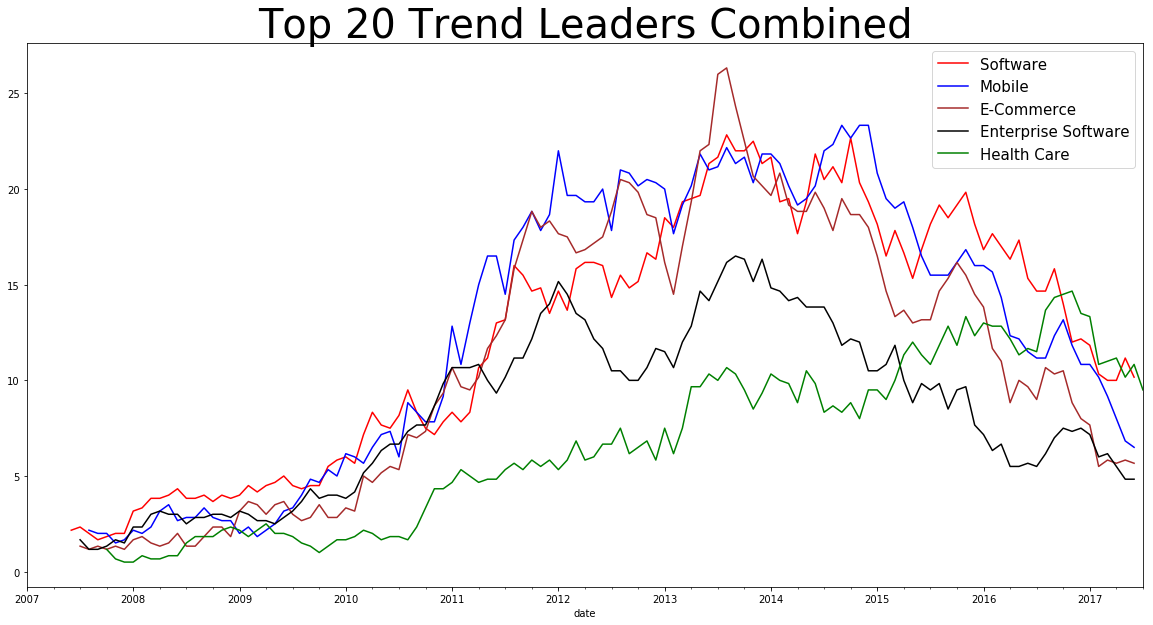

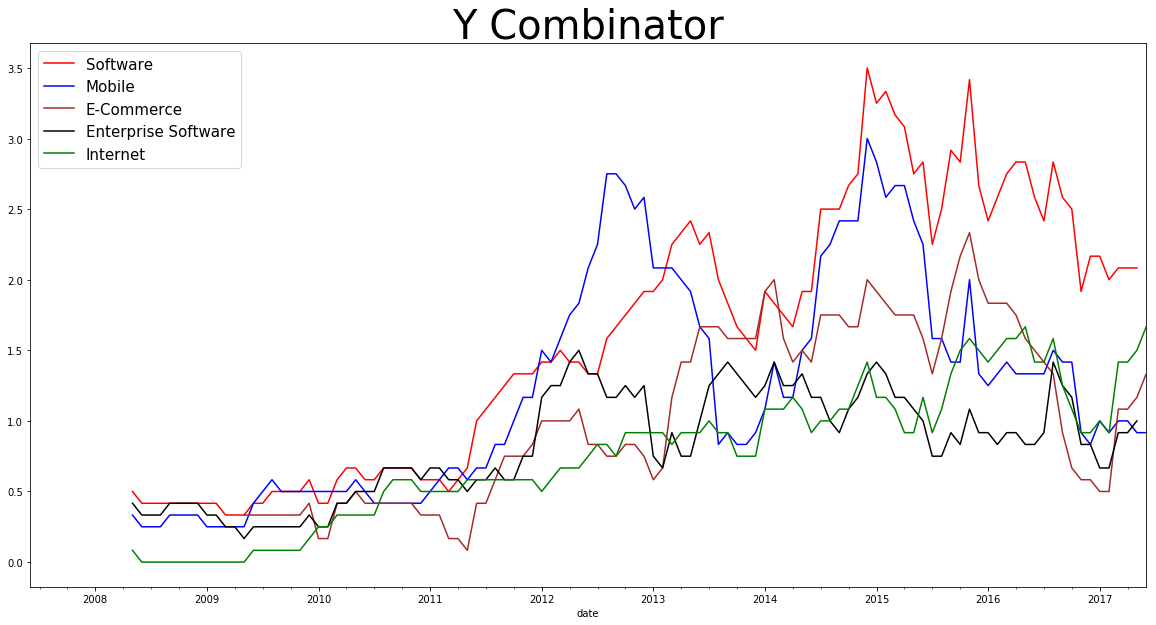

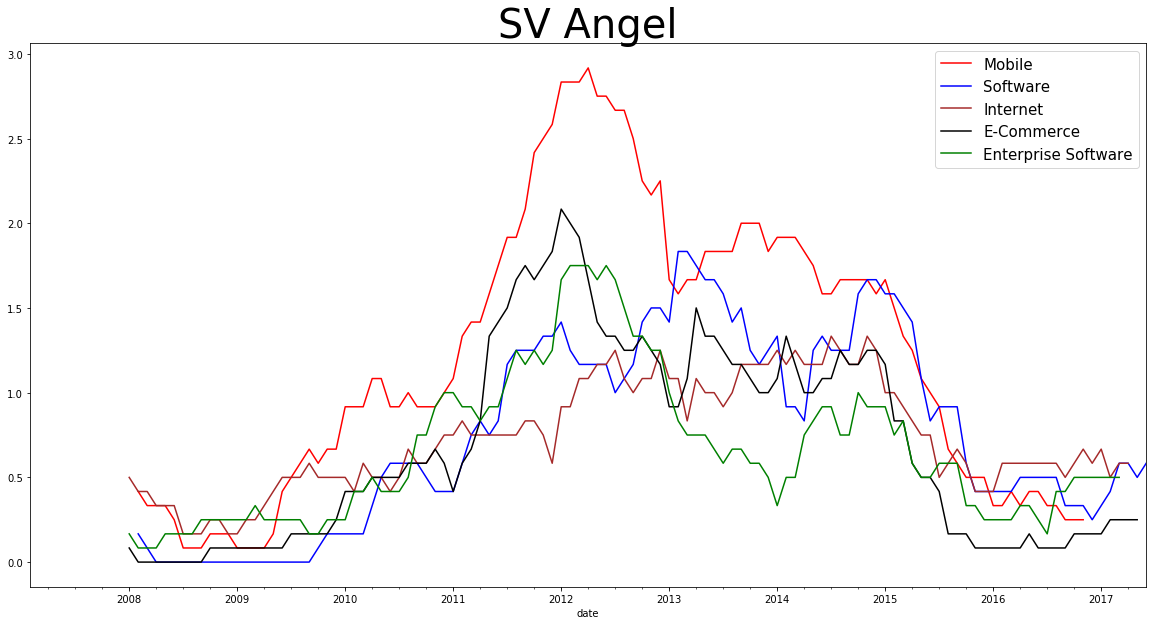

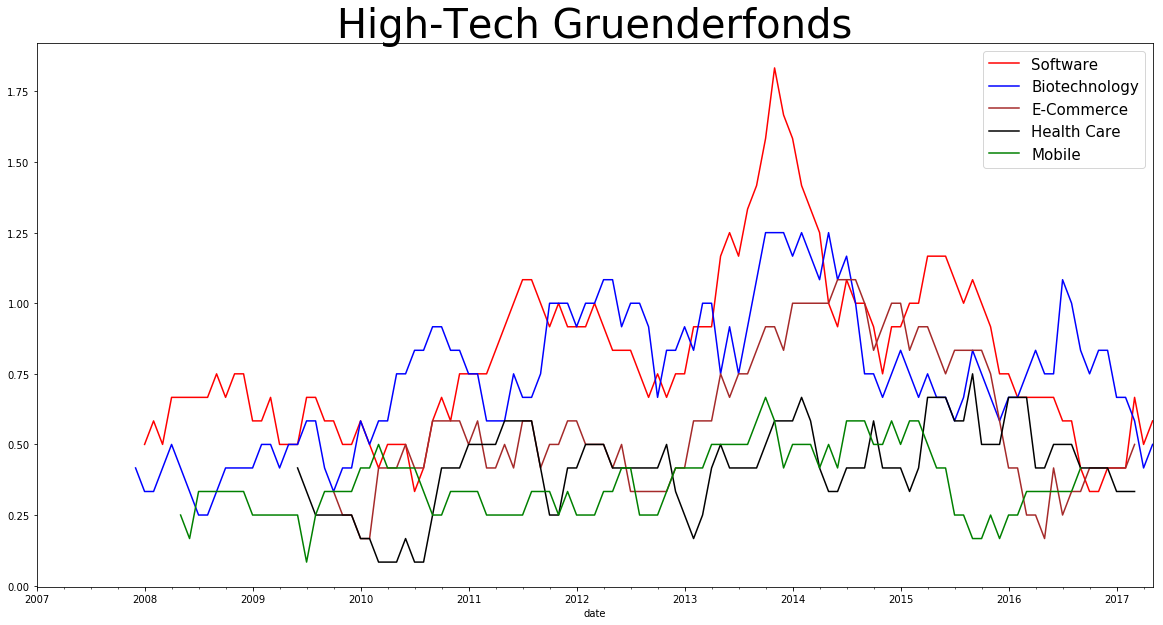

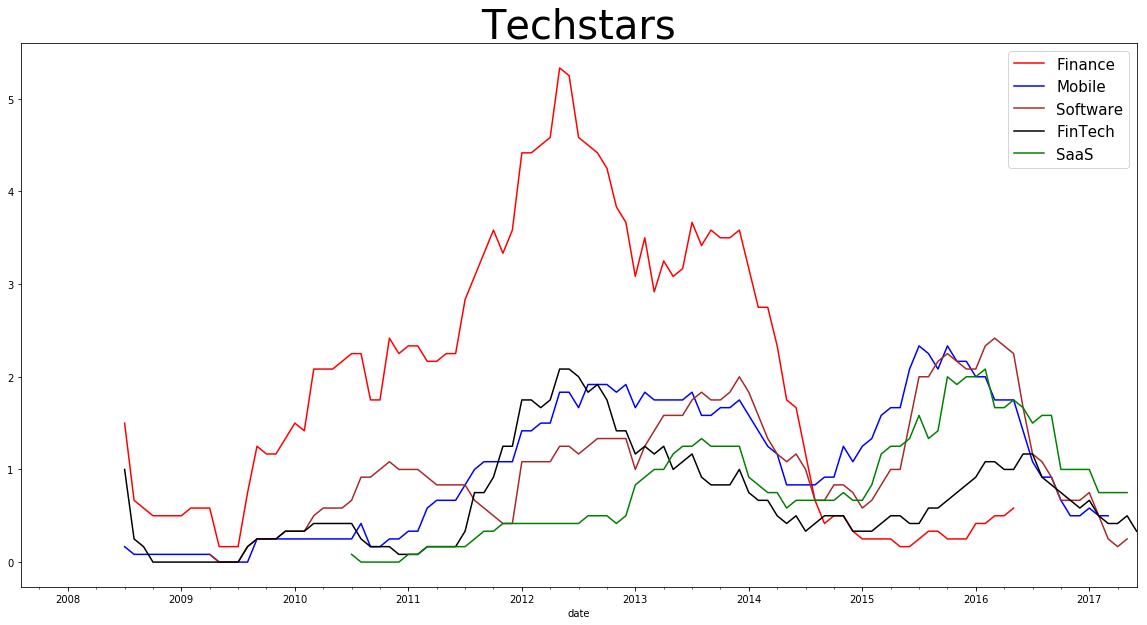

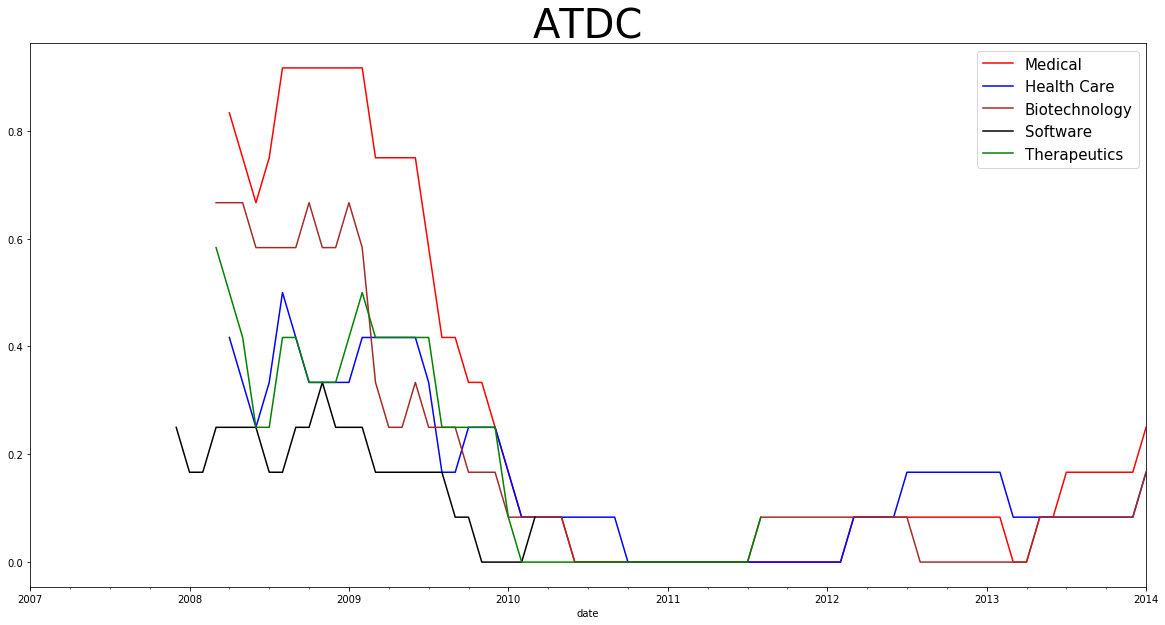

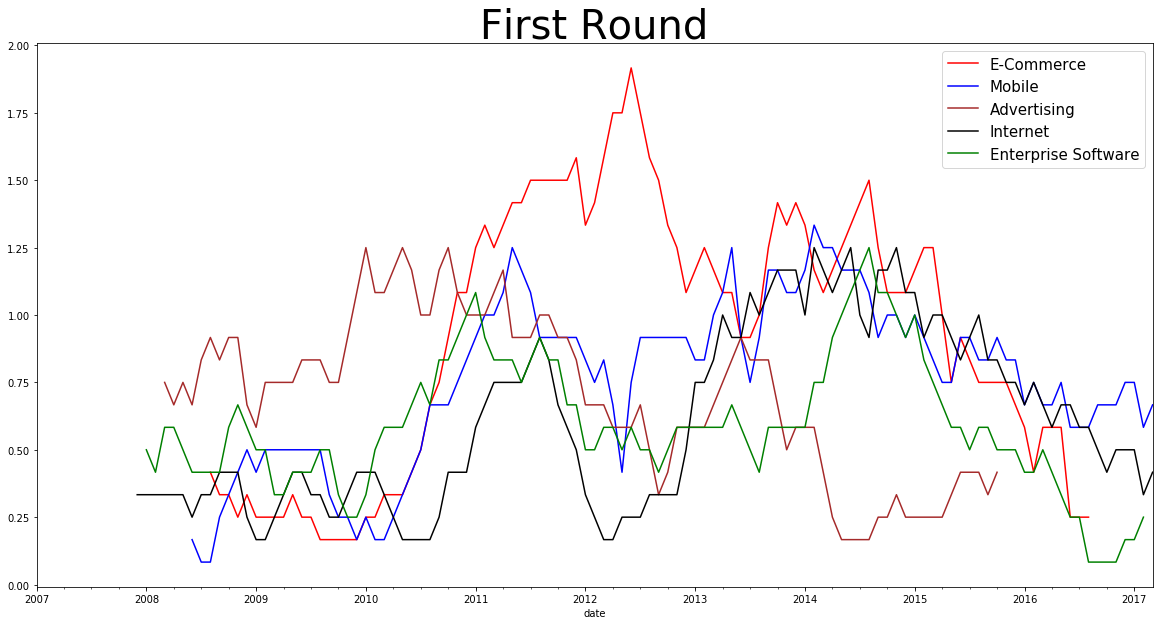

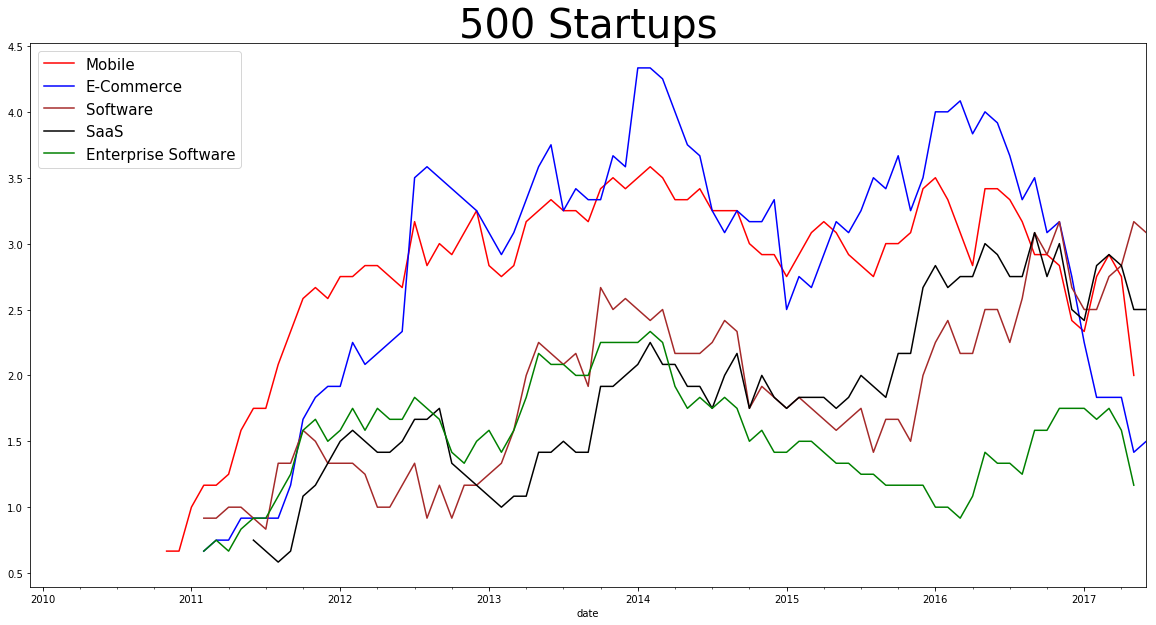

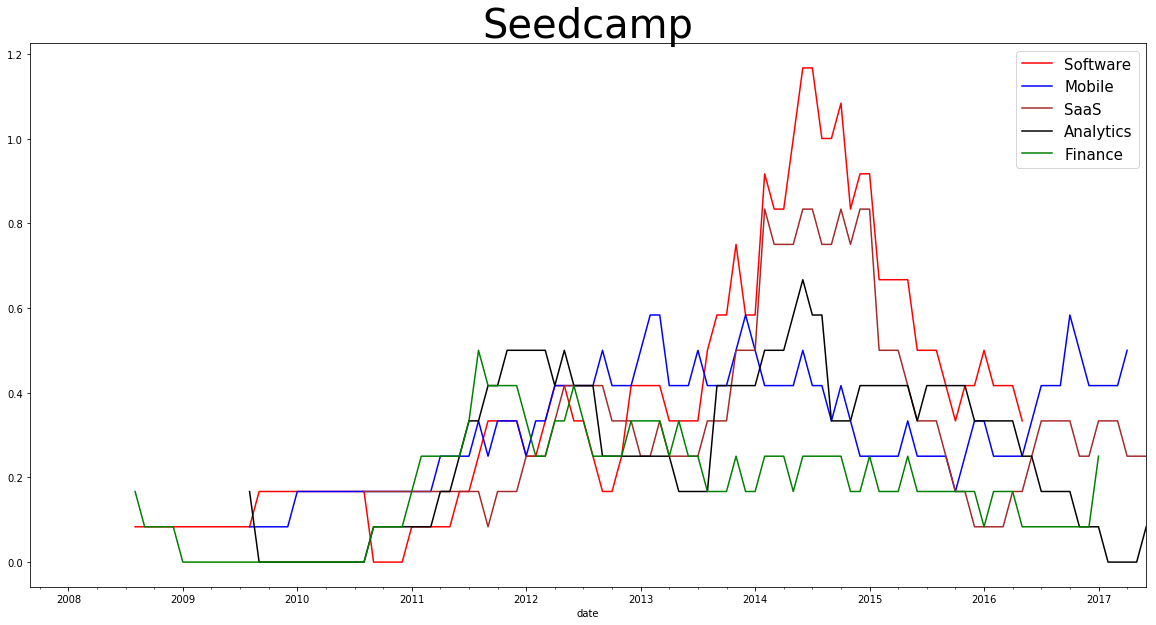

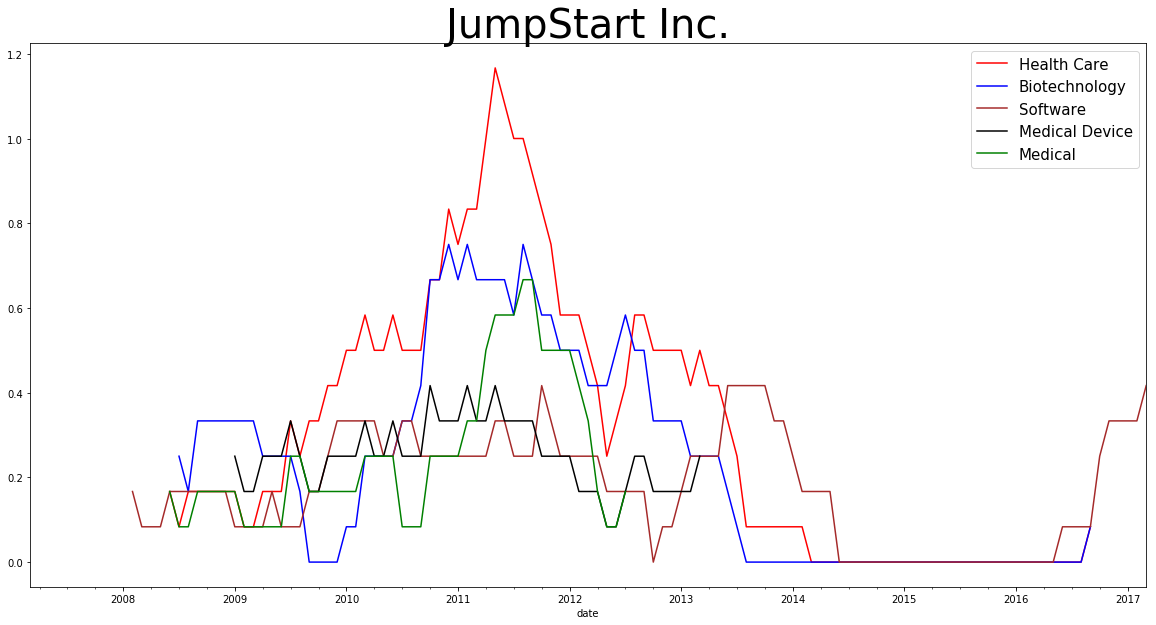

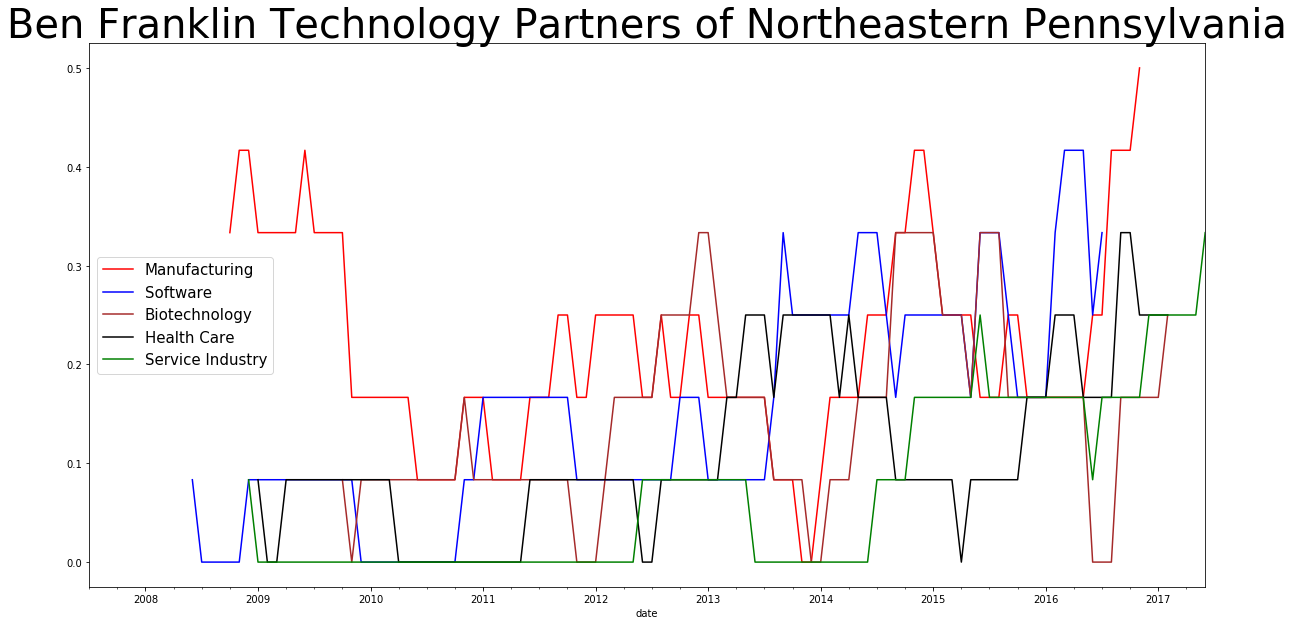

In [4]:
top_trend_leader_visualize('early_seed_investor_sqrt_harmonic_rank_for_all.pickle', '2007-01')

/home/joonheekim/Projects/kaggle_instacart/venv/lib/python3.4/site-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/joonheekim/Projects/kaggle_instacart/venv/lib/python3.4/site-packages/ipykernel_launcher.py:42: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=6).mean()
/home/joonheekim/Projects/kaggle_instacart/venv/lib/python3.4/site-packages/ipykernel_launcher.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-

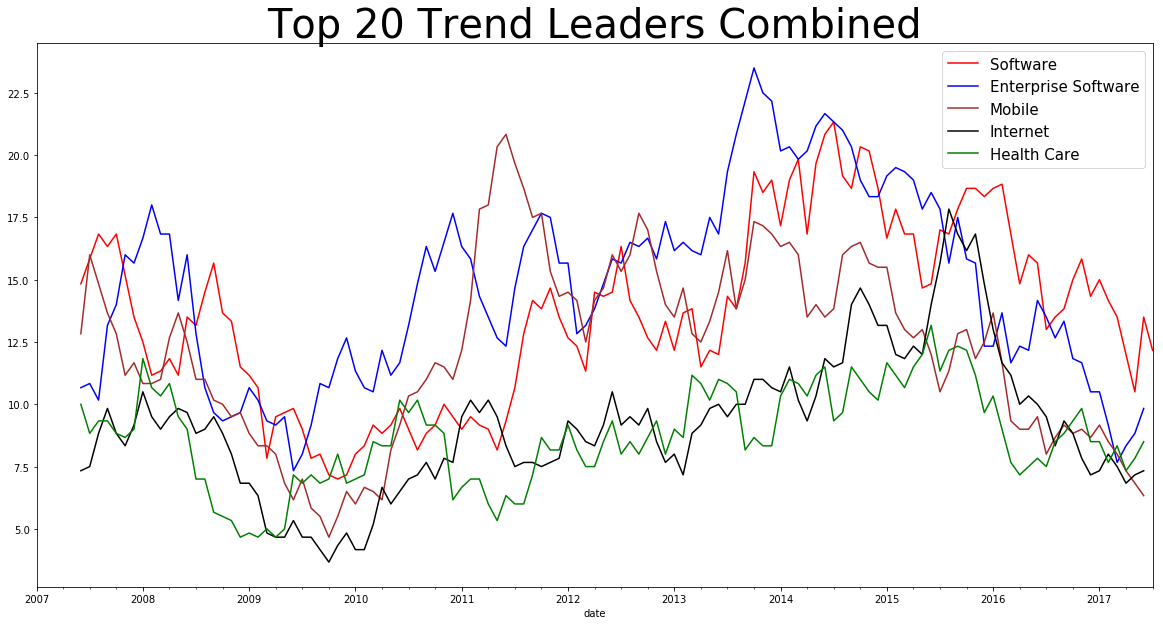

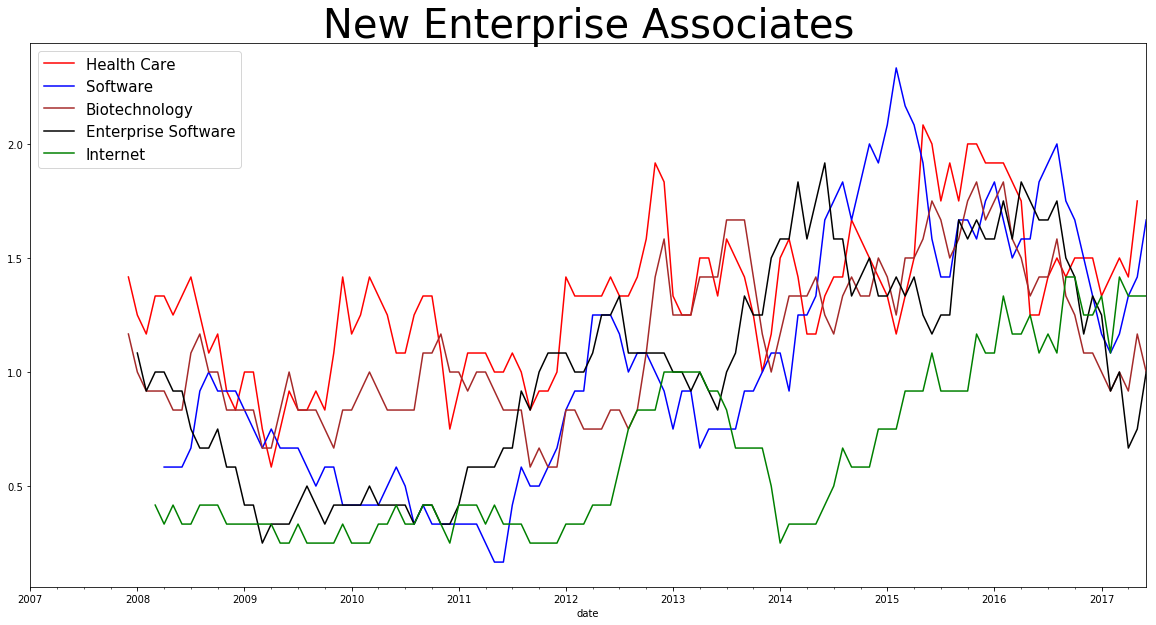

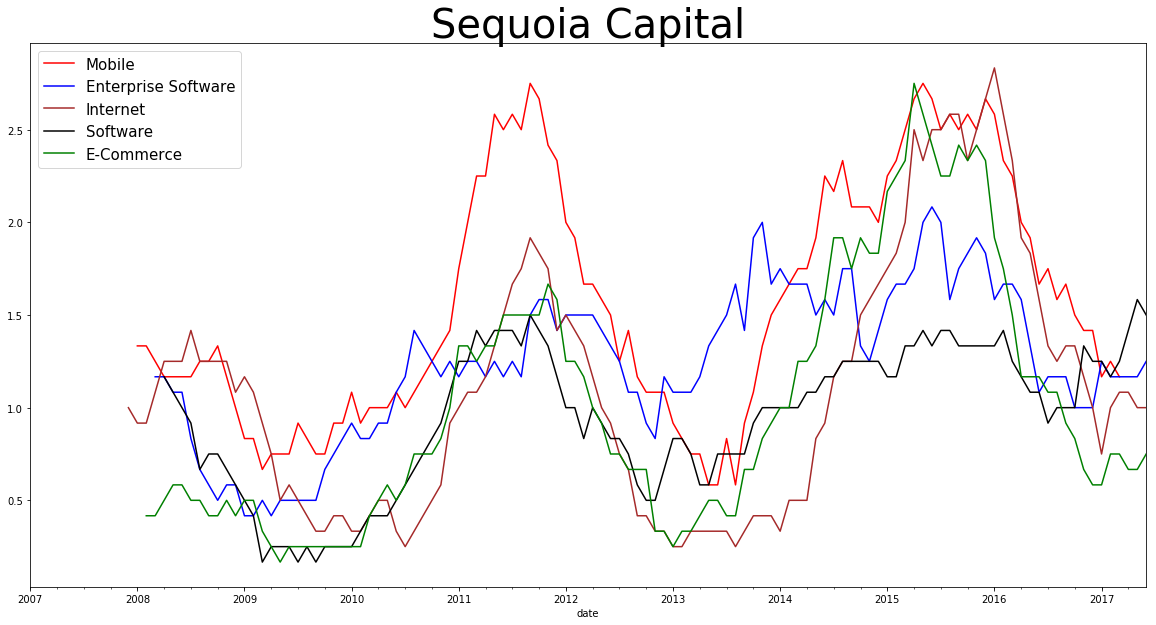

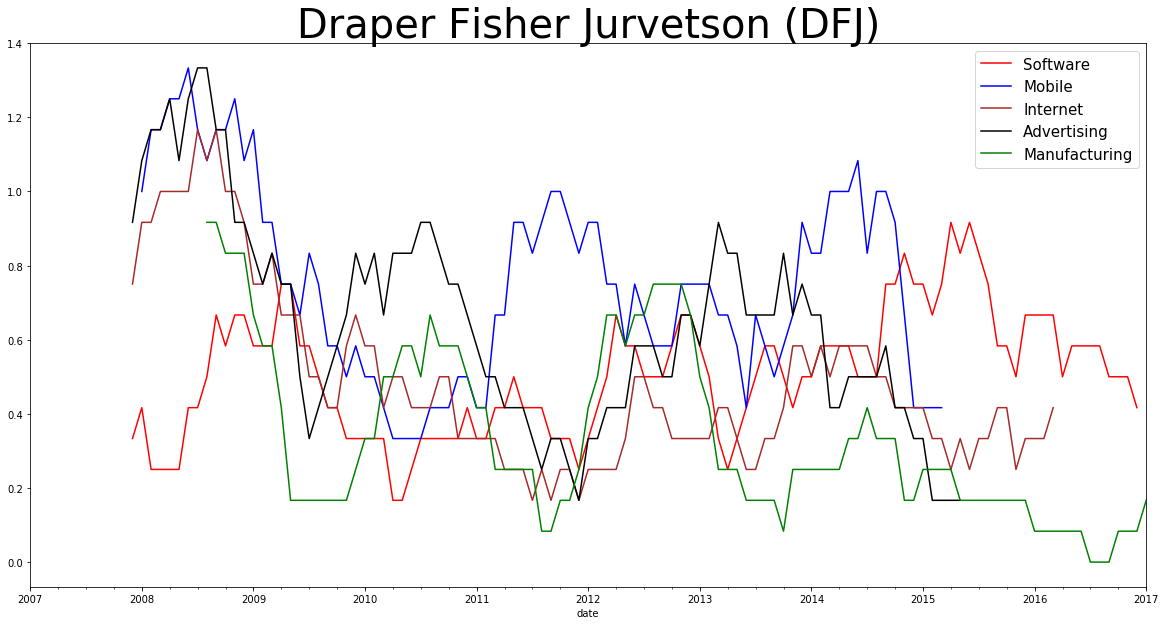

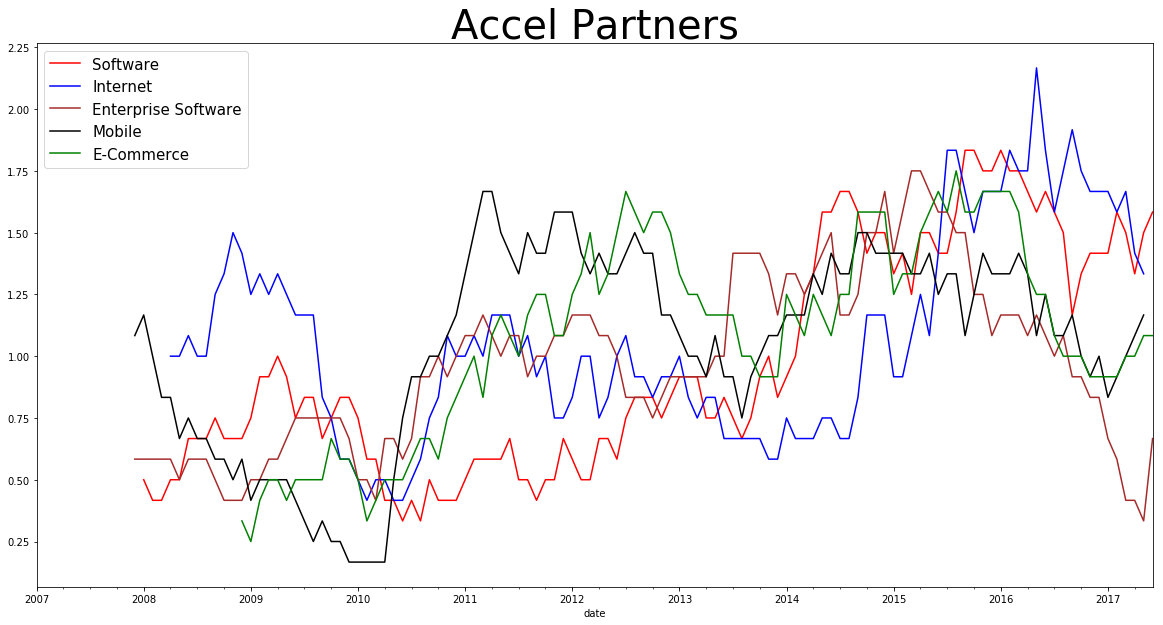

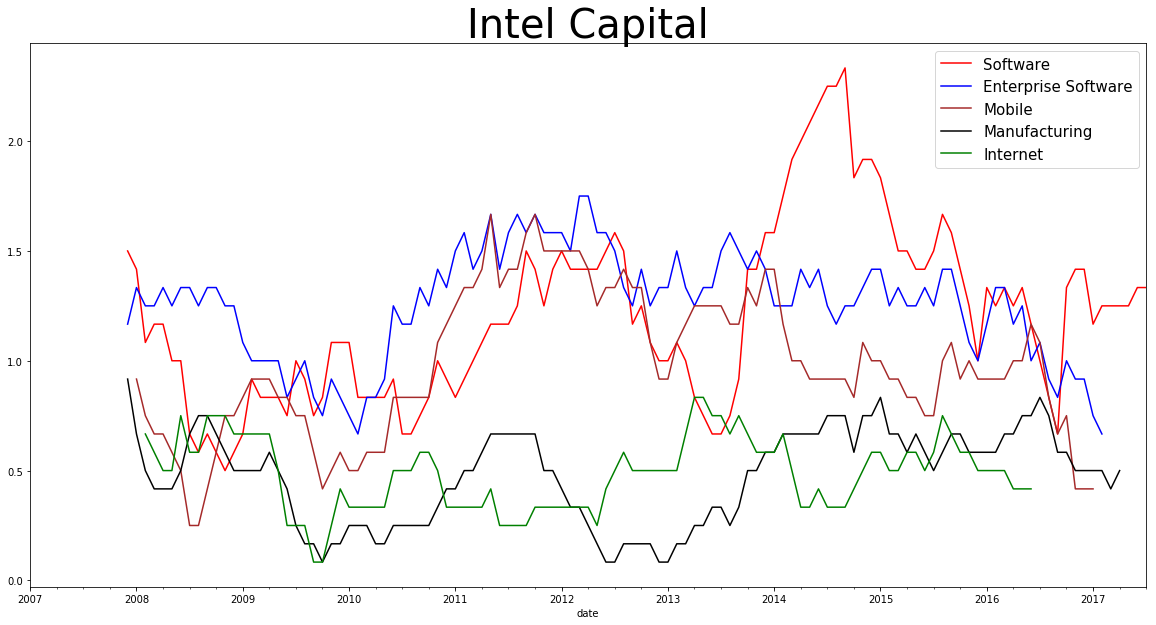

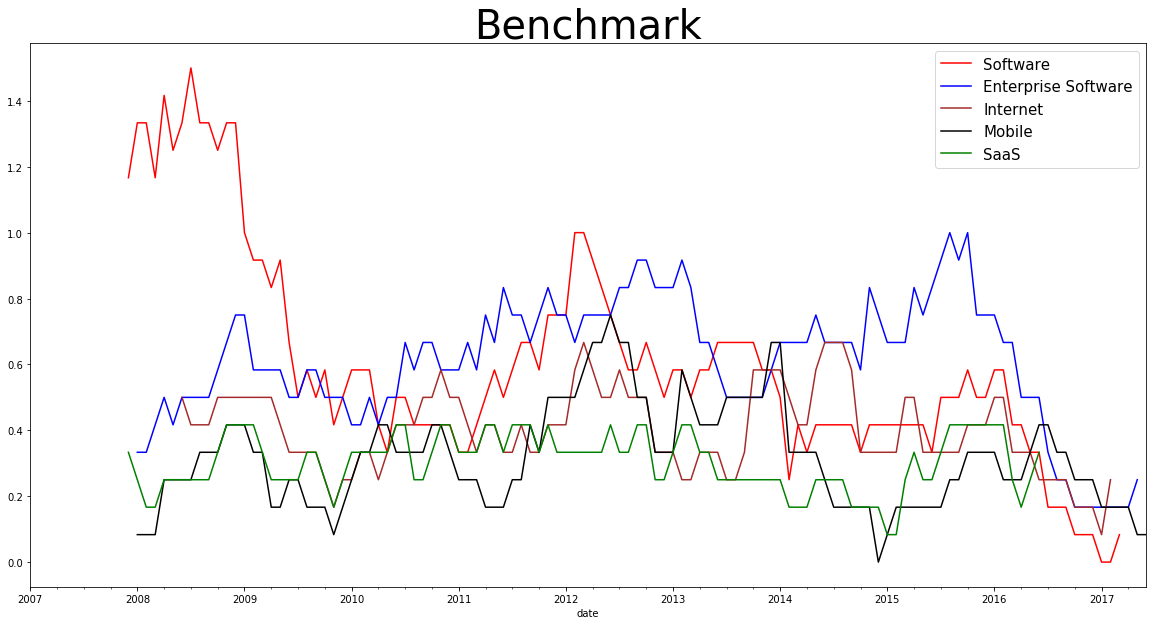

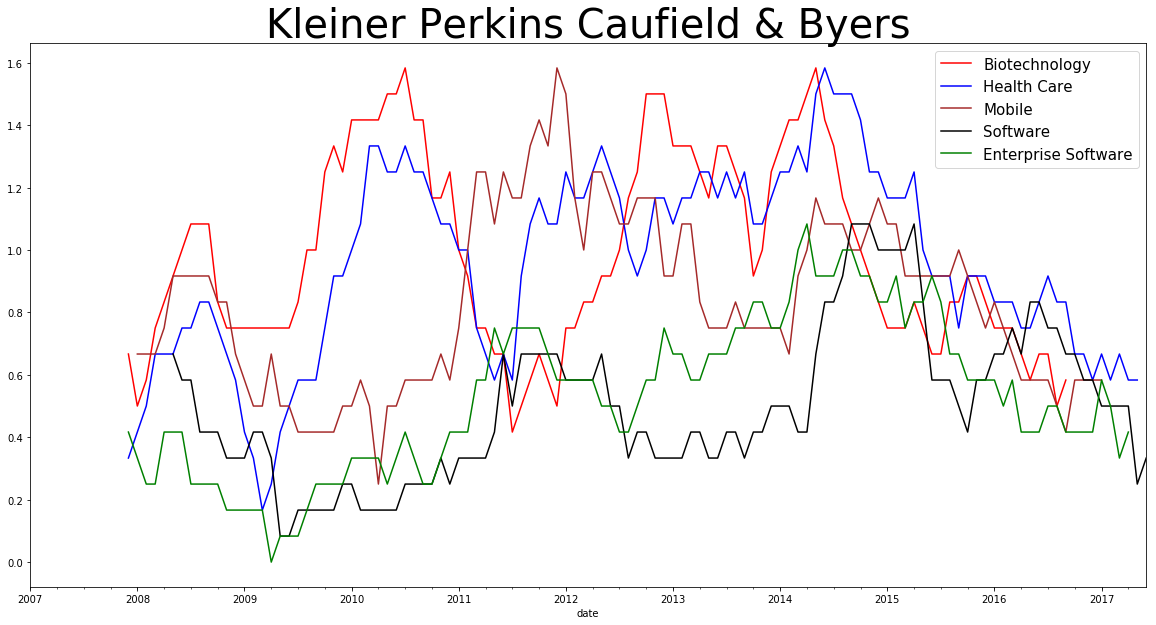

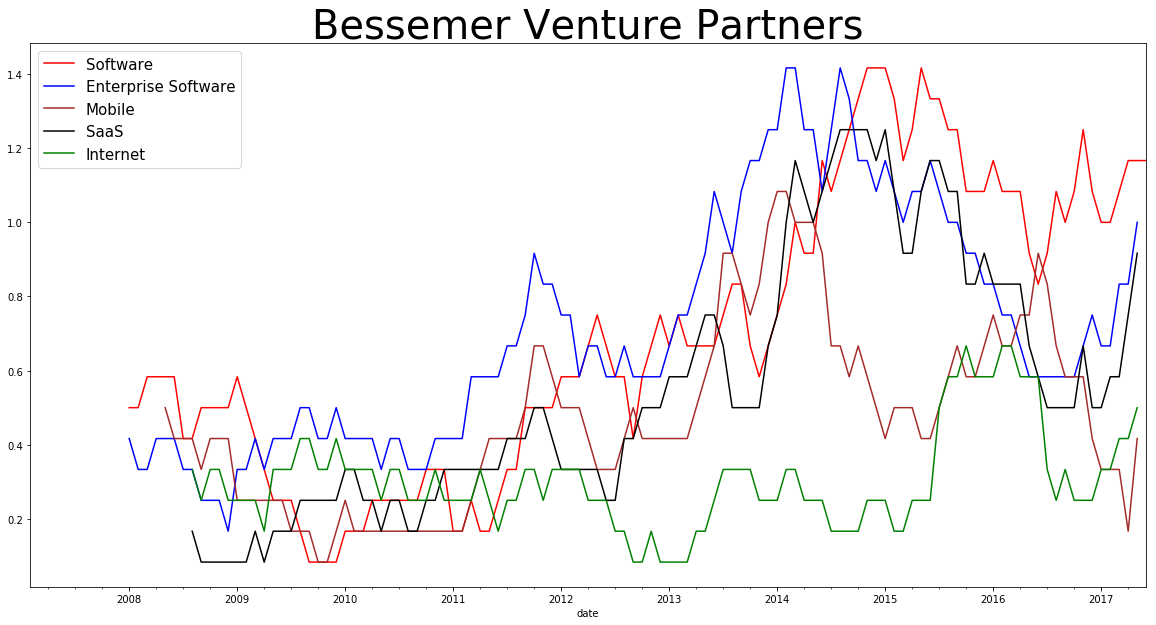

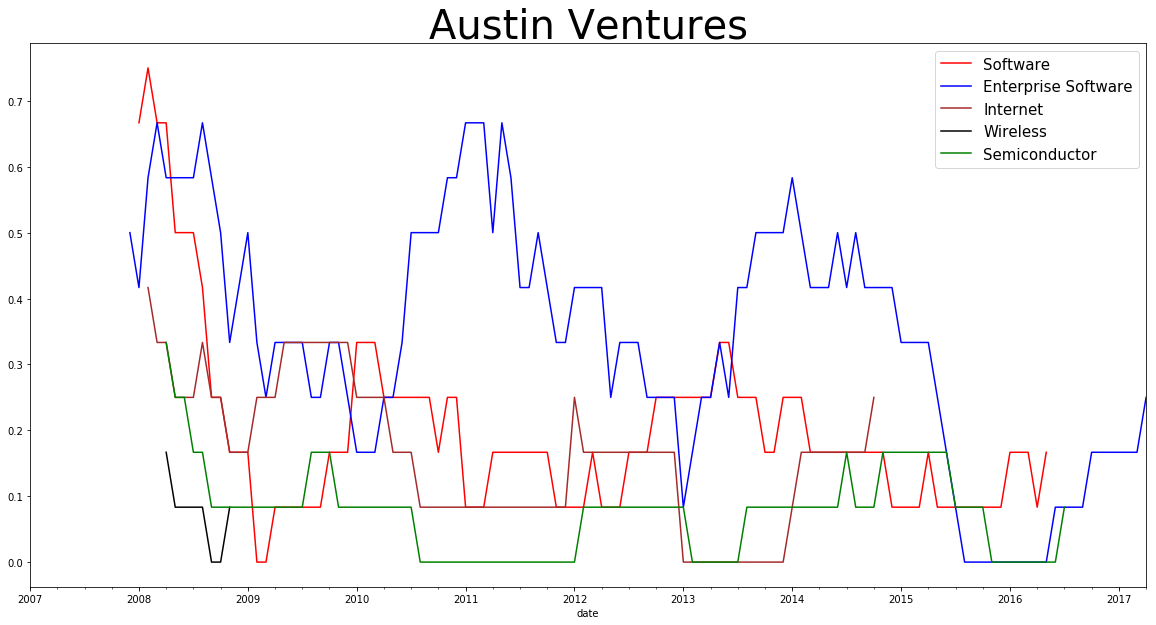

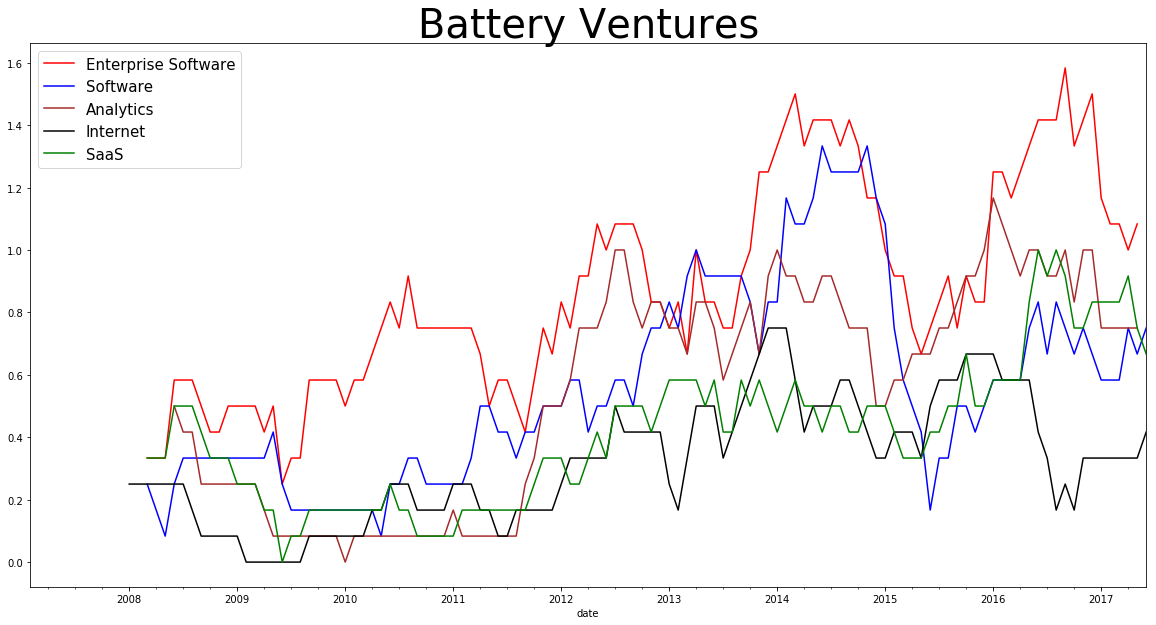

In [5]:
top_trend_leader_visualize('early_seed_A_B_C_D_E_investor_sqrt_harmonic_rank_for_all.pickle', '2007-01')